In [1]:
# ================================
# 1. Import libraries and load data
# ================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown

df = pd.read_csv('../data/SAML-D.csv')

# Quick view of the data
display(df.shape)
df.head()

(9504852, 12)

,Time,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,Laundering_type
0,10:35:19,2022-10-07,8724731955,2769355426,1459.15,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits
1,10:35:20,2022-10-07,1491989064,8401255335,6019.64,UK pounds,Dirham,UK,UAE,Cross-border,0,Normal_Fan_Out
2,10:35:20,2022-10-07,287305149,4404767002,14328.44,UK pounds,UK pounds,UK,UK,Cheque,0,Normal_Small_Fan_Out
3,10:35:21,2022-10-07,5376652437,9600420220,11895.00,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Fan_In
4,10:35:21,2022-10-07,9614186178,3803336972,115.25,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits


In [2]:
# Title
display(Markdown("## Exploratory Data Analysis (EDA)"))

## Exploratory Data Analysis (EDA)

In [3]:
# ===============================
# 2. Basic information
# ===============================
# Check structure, data types, and memory usage

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9504852 entries, 0 to 9504851
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Time                    object 
 1   Date                    object 
 2   Sender_account          int64  
 3   Receiver_account        int64  
 4   Amount                  float64
 5   Payment_currency        object 
 6   Received_currency       object 
 7   Sender_bank_location    object 
 8   Receiver_bank_location  object 
 9   Payment_type            object 
 10  Is_laundering           int64  
 11  Laundering_type         object 
dtypes: float64(1), int64(3), object(8)
memory usage: 870.2+ MB


In [4]:
# Descriptive statistics for numerical columns
df.describe()

,Sender_account,Receiver_account,Amount,Is_laundering
count,9.504852e+06,9.504852e+06,9.504852e+06,9.504852e+06
mean,5.006619e+09,5.006006e+09,8.762968e+03,1.038733e-03
std,2.885814e+09,2.884763e+09,2.561495e+04,3.221263e-02
min,9.018000e+03,9.018000e+03,3.730000e+00,0.000000e+00
25%,2.513133e+09,2.513219e+09,2.143688e+03,0.000000e+00
50%,5.001017e+09,5.002572e+09,6.113720e+03,0.000000e+00
75%,7.505051e+09,7.502397e+09,1.045846e+04,0.000000e+00
max,9.999987e+09,9.999971e+09,1.261850e+07,1.000000e+00


In [5]:
# Check for missing values
df.isna().sum()

Time                      0
Date                      0
Sender_account            0
Receiver_account          0
Amount                    0
Payment_currency          0
Received_currency         0
Sender_bank_location      0
Receiver_bank_location    0
Payment_type              0
Is_laundering             0
Laundering_type           0
dtype: int64

In [6]:
# Check for duplicates
df.duplicated().sum()

np.int64(0)

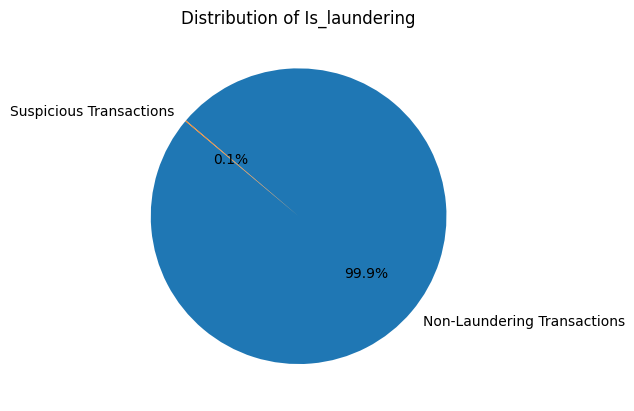

Is_laundering
0    9494979
1       9873
Name: count, dtype: int64

In [7]:
# ===============================
# 3. Target Is_laundering variable analysis
# ===============================

# Distribution of the target 'Is_laundering'
laundering_counts = df['Is_laundering'].value_counts()

# Pie chart for the distribution
plt.pie(laundering_counts, labels=['Non-Laundering Transactions', 'Suspicious Transactions'], 
        autopct='%1.1f%%', startangle=140)

plt.title('Distribution of Is_laundering')

plt.show()
display(laundering_counts)


In [8]:
# ===============================
# 4. Univariate analysis
# ===============================

# Analysis of 'Payment_type' frequency
# number of transactions per payment type
transactions_per_payment_type = df['Payment_type'].value_counts()
display(transactions_per_payment_type)


Payment_type
Credit card        2012909
Debit card         2012103
Cheque             2011419
ACH                2008807
Cross-border        933931
Cash Withdrawal     300477
Cash Deposit        225206
Name: count, dtype: int64

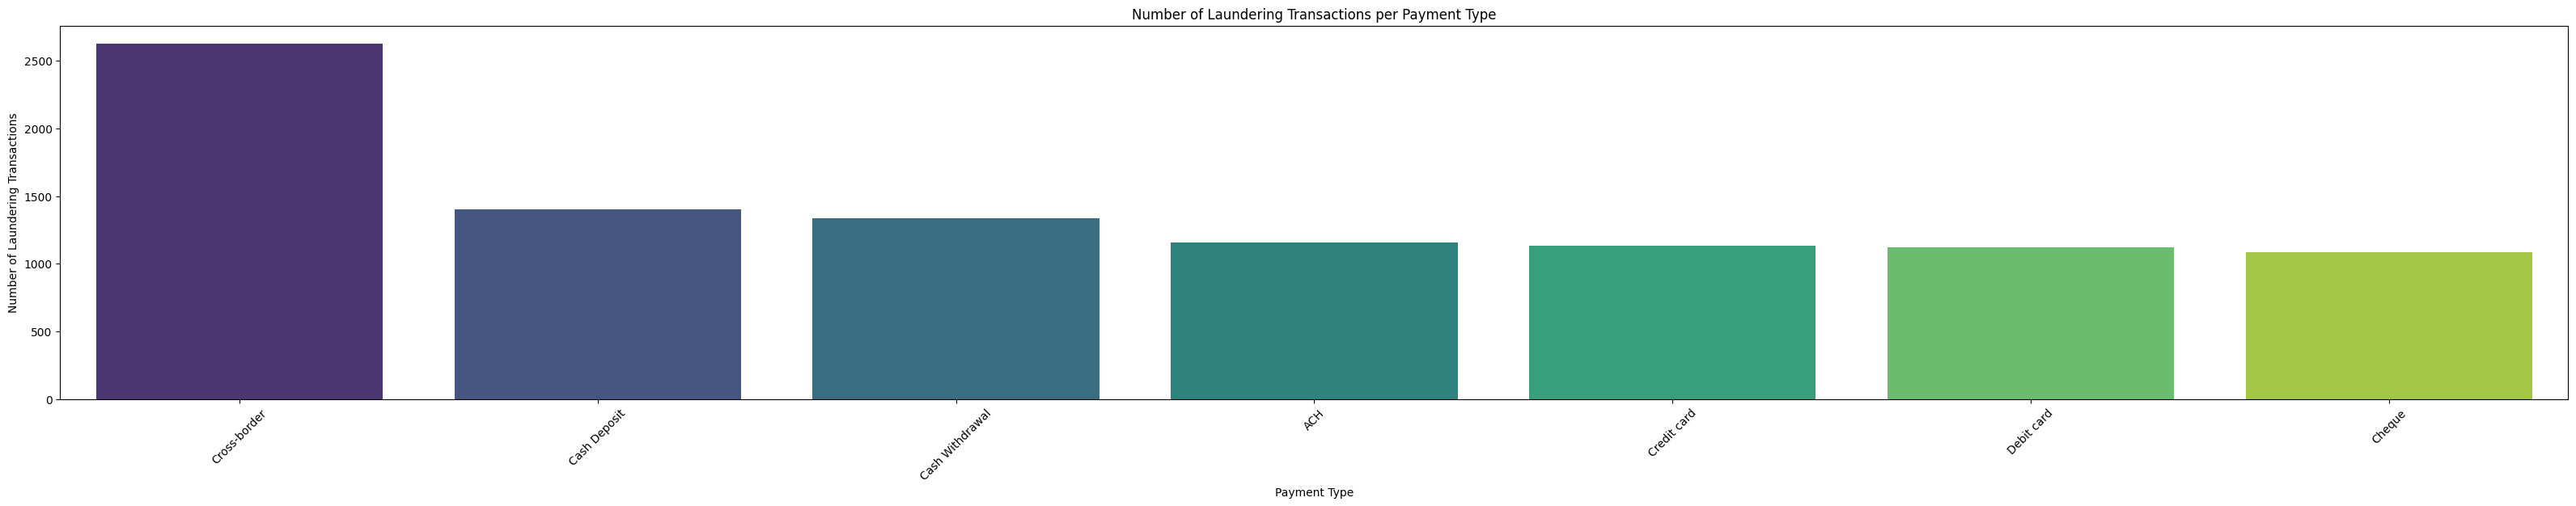

In [9]:
# ===============================
# 5. Bivariate analysis with target
# ===============================

# Analysis of 'Payment_type' vs 'Is_laundering'
# number of laundering transactions per payment type
laundering_transactions_per_payment_type = (
    df[df['Is_laundering'] == 1]
    .groupby('Payment_type')
    .size()
    .sort_values(ascending=False)
)

# Convert to dataFrame for better handling
laundering_df = laundering_transactions_per_payment_type.reset_index()
laundering_df.columns = ['Payment_type', 'Laundering_transactions'] # <-- Rename columns for the counts 

# Plot
plt.figure(figsize=(40,6))
sns.barplot(
    data=laundering_df,
    x='Payment_type',
    y='Laundering_transactions',
    hue='Payment_type',
    legend=False,
    palette='viridis', 
    order=laundering_df['Payment_type']
)

plt.title('Number of Laundering Transactions per Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Number of Laundering Transactions')
plt.xticks(rotation=45)
plt.show()

In [10]:
# Comparison table
comparison = pd.DataFrame({
    'Total_Transactions': transactions_per_payment_type,
    'Laundering_Transactions': laundering_transactions_per_payment_type
}).sort_values(by='Laundering_Transactions', ascending=False)    

# Calculate percentage of laundering transactions
comparison['%_Laundering'] = (
    comparison['Laundering_Transactions'] / comparison['Total_Transactions'] * 100
).round(2)

display(comparison)

,Total_Transactions,Laundering_Transactions,%_Laundering
Payment_type,,,
Cross-border,933931,2628,0.28
Cash Deposit,225206,1405,0.62
Cash Withdrawal,300477,1334,0.44
ACH,2008807,1159,0.06
Credit card,2012909,1136,0.06
Debit card,2012103,1124,0.06
Cheque,2011419,1087,0.05


In [11]:
# Chekcing Amount statistics for laundering vs non-laundering transactions
laundering_stats = df[df['Is_laundering'] == 1]['Amount'].agg(['max', 'mean', 'min'])
normal_stats = df[df['Is_laundering'] == 0]['Amount'].agg(['max', 'mean', 'min'])

display('Suspicious/Is_laundering Transactions Stats: ', laundering_stats)
display('Non-Laundering Transactions Stats: ', normal_stats)

'Suspicious/Is_laundering Transactions Stats: '

max     1.261850e+07
mean    4.058767e+04
min     1.582000e+01
Name: Amount, dtype: float64

'Non-Laundering Transactions Stats: '

max     999962.190000
mean      8729.875874
min          3.730000
Name: Amount, dtype: float64

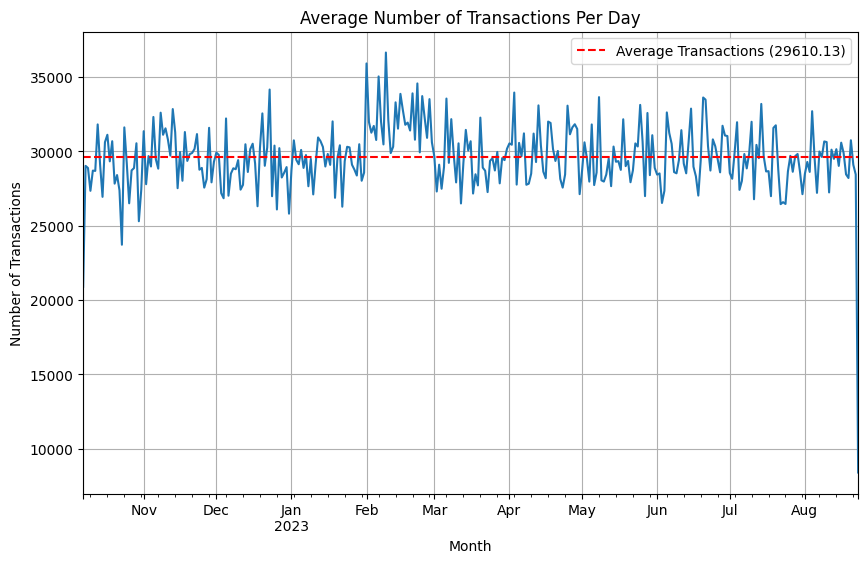

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
daily_transactions = df.groupby(df['Date'].dt.to_period('D')).size()

average_daily_transactions = daily_transactions.mean()

daily_transactions.plot(kind='line', 
                          figsize=(10,6), 
                          title='Average Number of Transactions Per Day')

# Plot average line
plt.axhline(y=average_daily_transactions, 
            color='r', 
            linestyle='--', 
            label=f'Average Transactions ({average_daily_transactions:.2f})')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
#plt.title('Average Number of Transactions Per Day')
plt.legend()
plt.grid(True)
plt.show()


In [29]:
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour
hourly_transactions = df.groupby('Hour').size().sort_values(ascending=False)
display(hourly_transactions)

Hour
13    540796
14    540282
10    539942
11    539901
16    539647
15    539480
17    539364
9     539044
8     538992
12    538855
22    519870
18    519658
23    519170
19    519059
21    518362
20    518346
7     142497
5     122114
1     121964
2     121627
4     121568
0     121548
6     121484
3     121282
dtype: int64

In [23]:
df['DateTime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str))
hourly_transactions = df.groupby(df['DateTime'].dt.to_period('h')).size().sort_values(ascending=False)
display(hourly_transactions)

DateTime
2023-02-09 08:00    2151
2023-02-09 17:00    2133
2023-02-01 15:00    2132
2023-02-01 13:00    2111
2023-02-09 11:00    2108
                    ... 
2022-10-26 05:00     297
2022-12-06 03:00     295
2022-10-23 05:00     293
2022-10-23 07:00     286
2022-10-23 01:00     285
Freq: h, Length: 7681, dtype: int64

<Axes: title={'center': 'Average Transactions per Hour of Day'}, xlabel='Hour'>

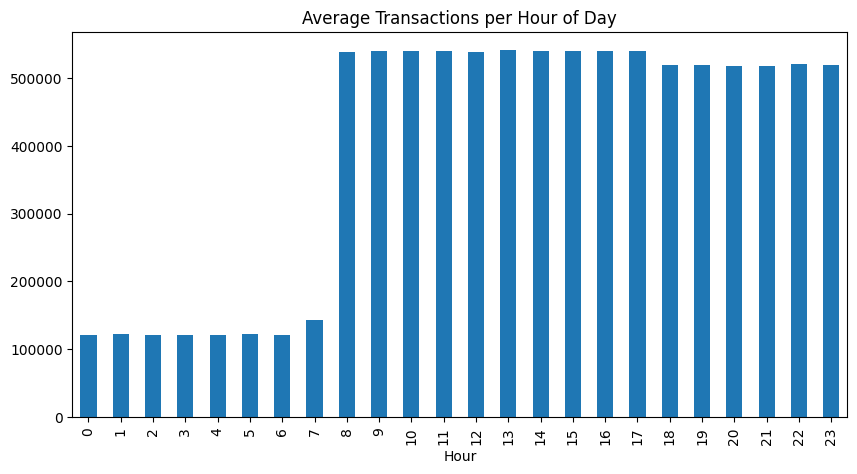

In [28]:
df['Hour'] = df['DateTime'].dt.hour
hourly_pattern = df.groupby('Hour').size()

hourly_pattern.plot(
    kind='bar',
    figsize=(10,5),
    title='Average Transactions per Hour of Day'
)



/home/damaris/Escritorio/dataScience/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128339 (\N{CLOCK FACE FOUR OCLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


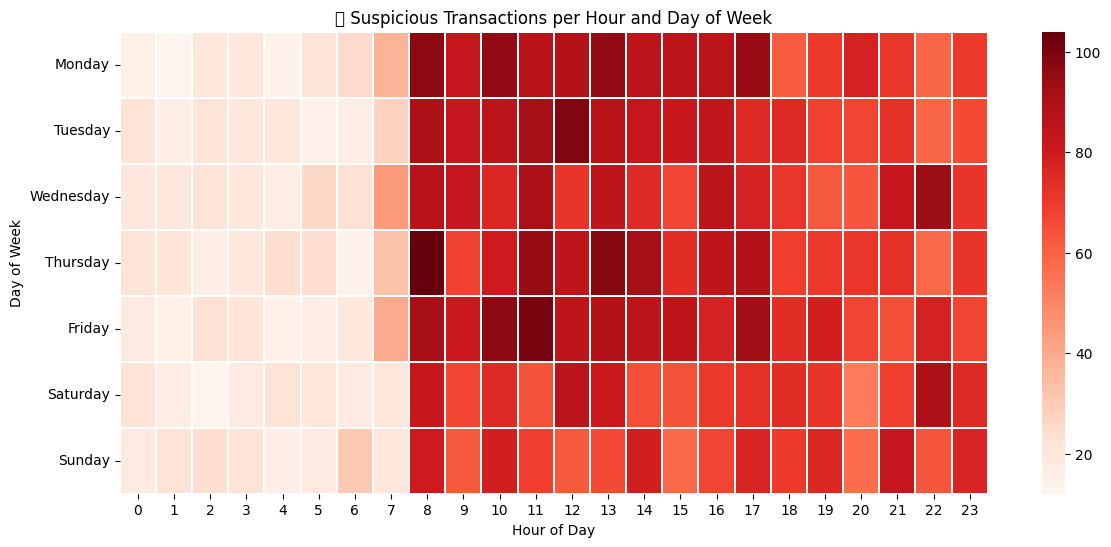

In [32]:
# Crear copia filtrada para evitar el warning
laundering = df[df['Is_laundering'] == 1].copy()

# Extraer hora y día
laundering['Hour'] = laundering['DateTime'].dt.hour
laundering['DayOfWeek'] = laundering['DateTime'].dt.day_name()

# Crear tabla para el heatmap
heatmap_laundering = laundering.pivot_table(
    index='DayOfWeek',
    columns='Hour',
    values='Amount',
    aggfunc='count'
).fillna(0)

# Orden correcto de días
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_laundering = heatmap_laundering.reindex(order)

# Dibujar heatmap
plt.figure(figsize=(14,6))
sns.heatmap(heatmap_laundering, cmap='Reds', linewidths=0.3)
plt.title('🕓 Suspicious Transactions per Hour and Day of Week')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()

In [13]:
sender_bank_location = df['Sender_bank_location'].value_counts()
print(sender_bank_location)
print("\n")
receiver_bank_location = df['Receiver_bank_location'].value_counts()
print(receiver_bank_location)

Sender_bank_location
UK             9183088
Turkey           20902
Switzerland      20503
Pakistan         20346
UAE              20081
Nigeria          20027
Spain            19391
Germany          19259
USA              19027
Italy            18895
France           18702
Japan            18468
Morocco          18437
Austria          18050
Mexico           17662
Albania          17648
India            17596
Netherlands      16770
Name: count, dtype: int64


Receiver_bank_location
UK             8864634
Pakistan         38980
Austria          38844
Albania          38783
Japan            38729
Morocco          38704
Germany          38540
France           38512
Mexico           38385
Nigeria          38272
Netherlands      37314
Spain            37288
India            36936
USA              36850
Italy            36517
Switzerland      36081
UAE              35897
Turkey           35586
Name: count, dtype: int64


In [14]:
countries_stats = df.groupby('Sender_bank_location').size() + df.groupby('Receiver_bank_location').size()
countries = countries_stats.sort_values(ascending=False)
print(countries)

Sender_bank_location
UK             18047722
Pakistan          59326
Nigeria           58299
Germany           57799
France            57214
Japan             57197
Morocco           57141
Austria           56894
Spain             56679
Switzerland       56584
Turkey            56488
Albania           56431
Mexico            56047
UAE               55978
USA               55877
Italy             55412
India             54532
Netherlands       54084
dtype: int64
